In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

<font sixe="5" color="red">ch12 데이터시각화 </font></b>
(https://pypi.org/project/matplotlib)
(https://matplotlib.org/stable/api/index)

- 시각화 라이브러리 : matplotlib, seaborn(데이터시각화), folium(지도시각화)
- matplotlib : 파이썬에서 가장 쉽게 많이 사용하는 시각화 라이브러리. 판다스 내부에 포함
- seaborn : matplotlib기반으로 다양한 색, 테마, 챠트 기능과 groupby 기능 포함된 라이브러리

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina' 
# 한글설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지
# plt.rc('font', family='AppleGothic') # Mac
# plt.rcParams['font.family'] = 'Malgun Gothic'

# warning(경고) 안보이게

# 2절 seaborn
- seaborn으로 그래프 그리기 위해 다음 단계 따릅니다. 
    1. 데이터 준비
    2. 미적 속성 설정(한글설정 다시)
    3. 함수를 이용해서 그래프 그리기(수치형, 범주형, 쌍관계, 밀도, 회귀, 다중그래프)
    4. 그래프출력(show), 저장(saveifg)

## 2.1 데이터가져오기

In [4]:
import seaborn as sns
iris=sns.load_dataset('iris')

In [7]:
titanic = sns.load_dataset('titanic')
titanic.shape

(891, 15)

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [9]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [10]:
iris.shape

(150, 5)

## 2.2 미적속성 설정하기(style, context, palette,figsize...)
### (1) 그래프 스타일 설정


Text(0.5, 0, '꽃잎길이')

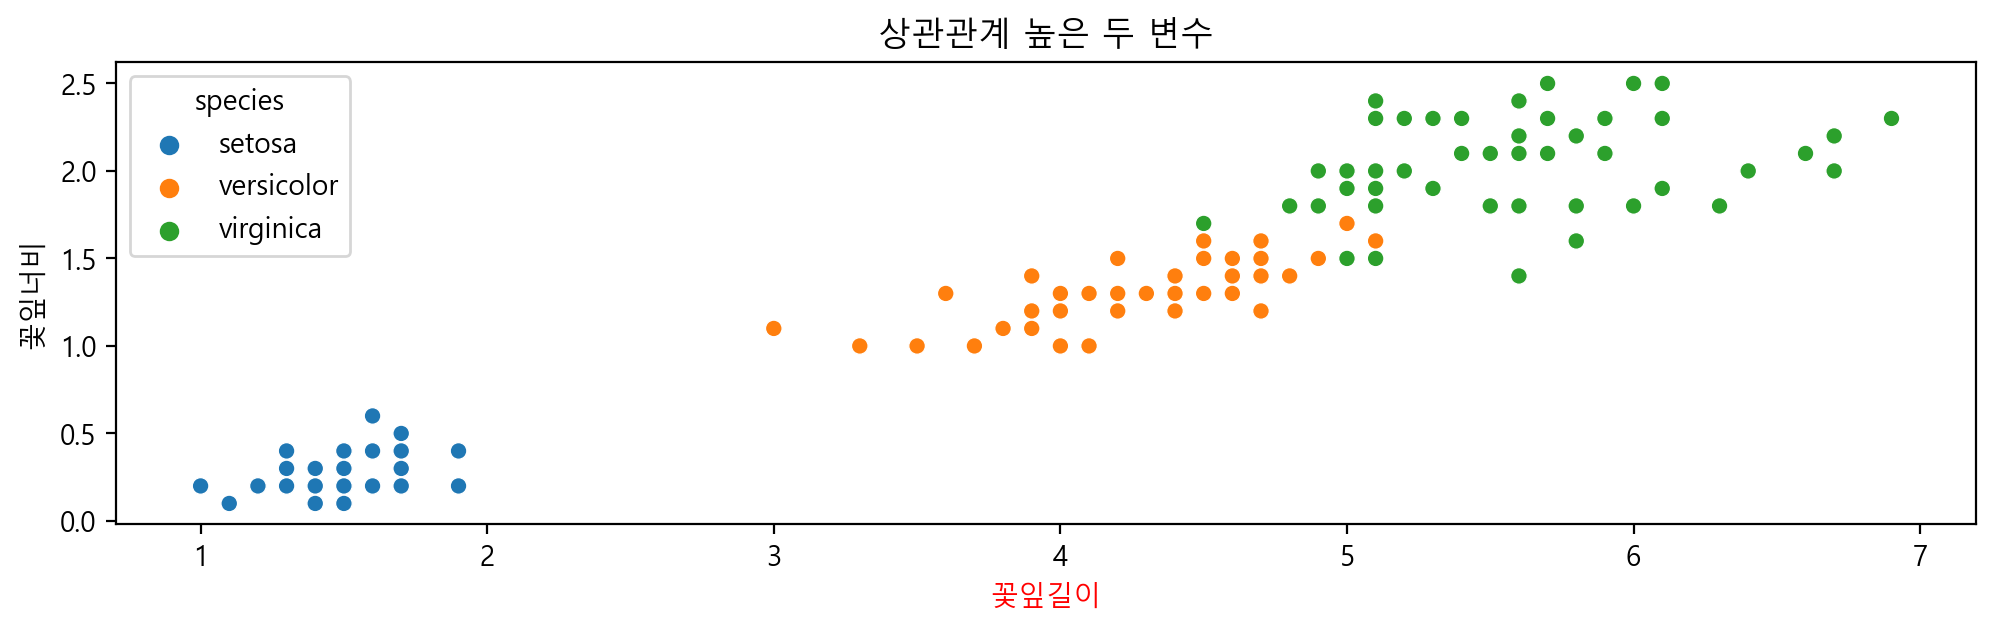

In [12]:
plt.figure(figsize=(12,3))
#sns.set(style = 'dark') #white, whitegrid, dark, darkgrid, ticks
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지
ax= sns.scatterplot(data=iris, x= 'petal_length',y= 'petal_width',hue='species')
ax.set(title = '상관관계 높은 두 변수', ylabel= '꽃잎너비')
ax.set_xlabel('꽃잎길이', color = 'r')

### 02) 컨텍스트 지정(비율)

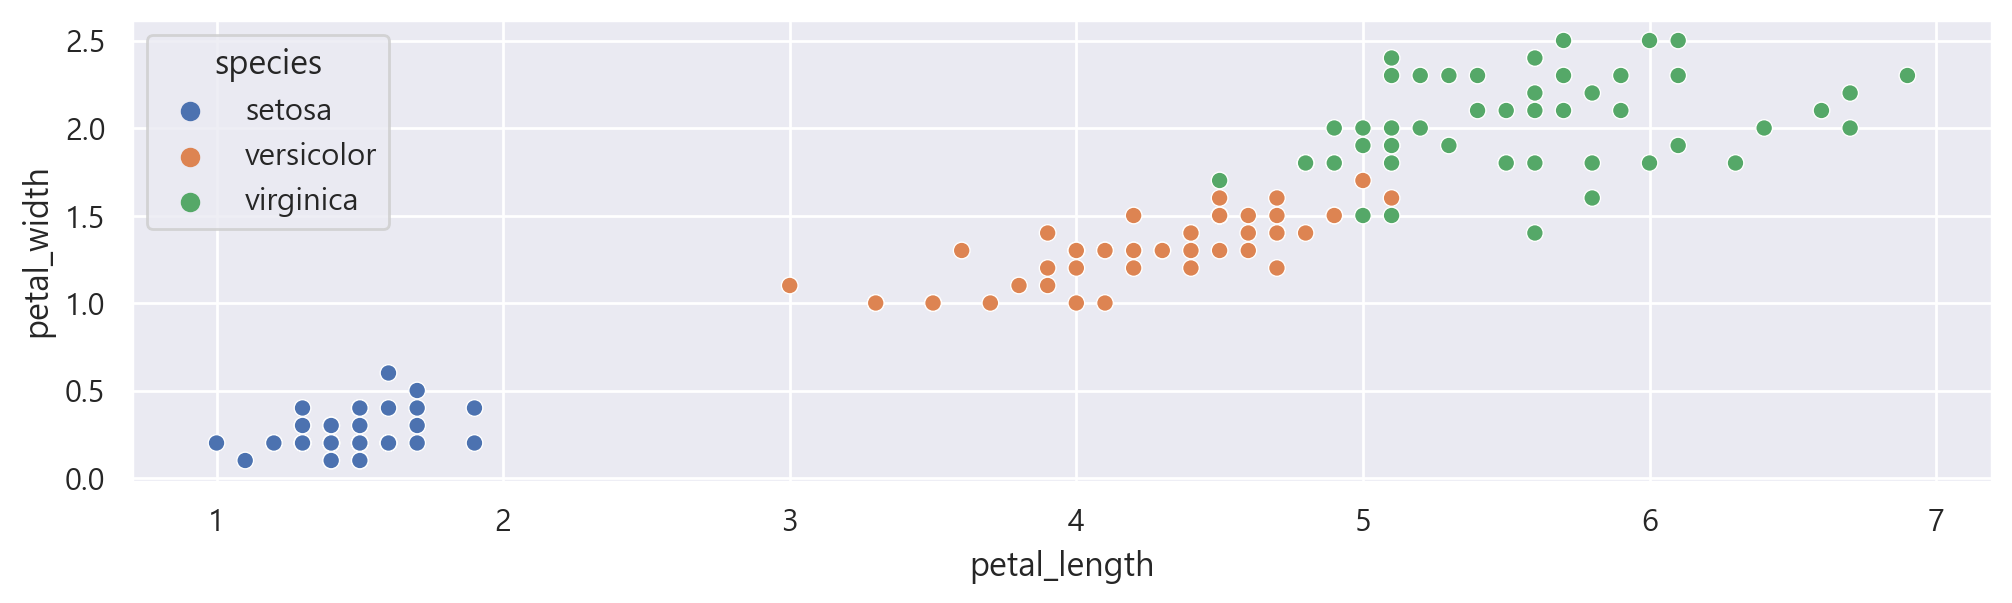

In [13]:
plt.figure(figsize=(12,3))
sns.set(context='notebook')
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지
sns.scatterplot(data=iris, x= 'petal_length',y= 'petal_width',hue='species')
plt.show()

## 3) 컬러팔레트

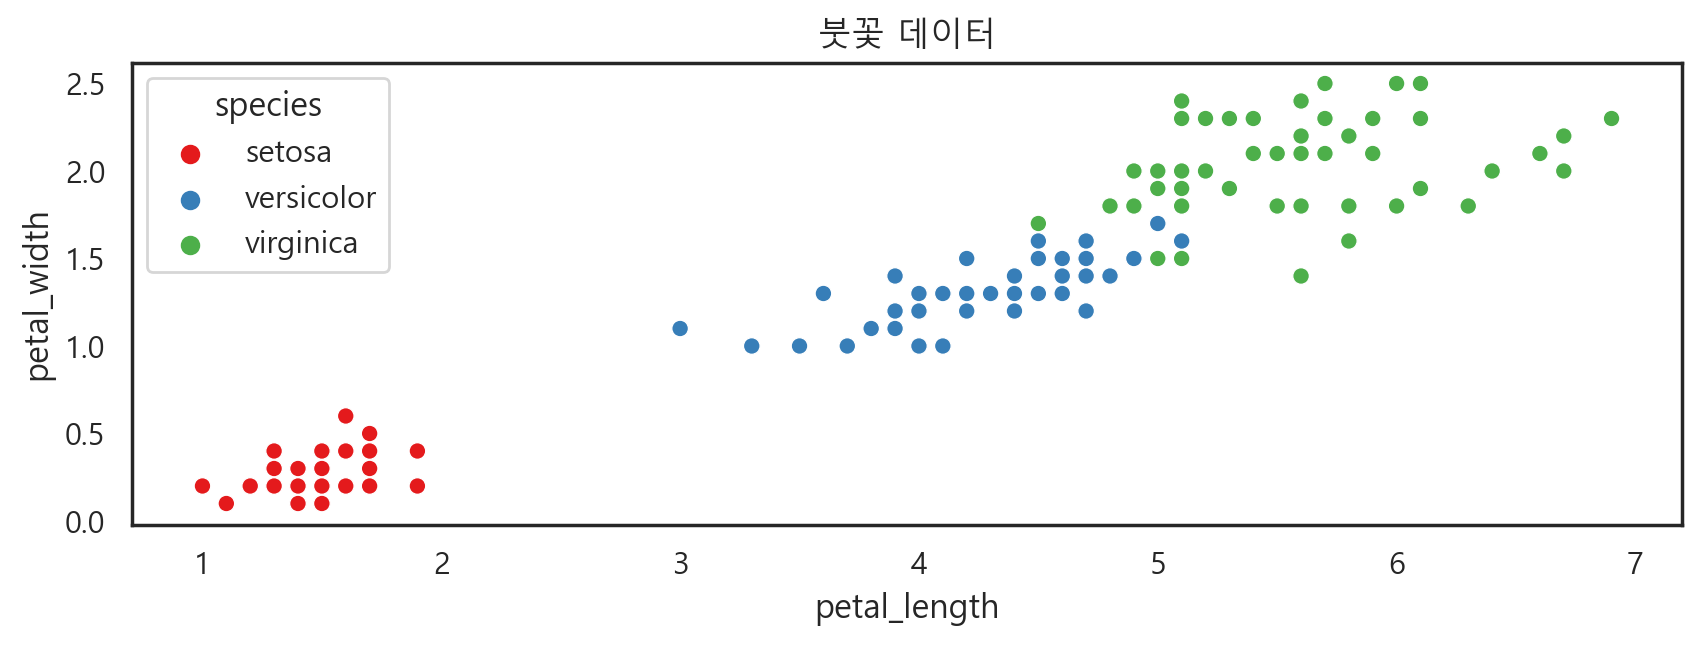

In [35]:
sns.set(palette='Pastel1', style='white', context='notebook') # 기본 미적 속성설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지
ax = sns.scatterplot(data=iris, x='petal_length', y='petal_width',
               hue='species', palette='Set1')
ax.set_title('붓꽃 데이터')
plt.show()

In [36]:
sns.set(palette='Dark2', 
        style='whitegrid', 
        context='notebook',
        rc={'figure.figsize':(10,3)}) # 기본 미적 속성설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

## 2.3 Seaborn 함수로 그래프 그리기
### 1) 관계형 그래프 
    - x축이 수치형 데이타
    - ex) scatterplot, lineplot => relplot(서브플롯)

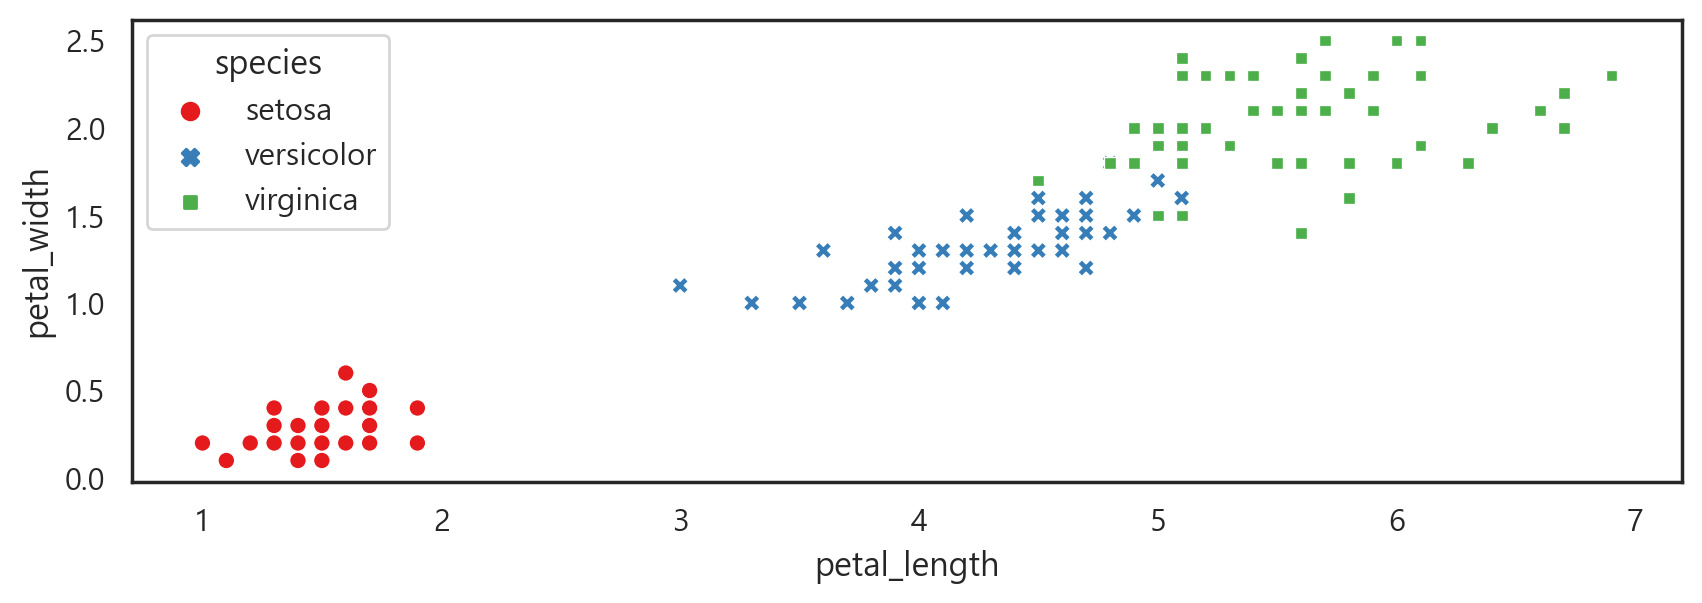

In [34]:
sns.scatterplot(data=iris,palette='Set1', x='petal_length', y= 'petal_width', hue= 'species', style= 'species')
plt.show()

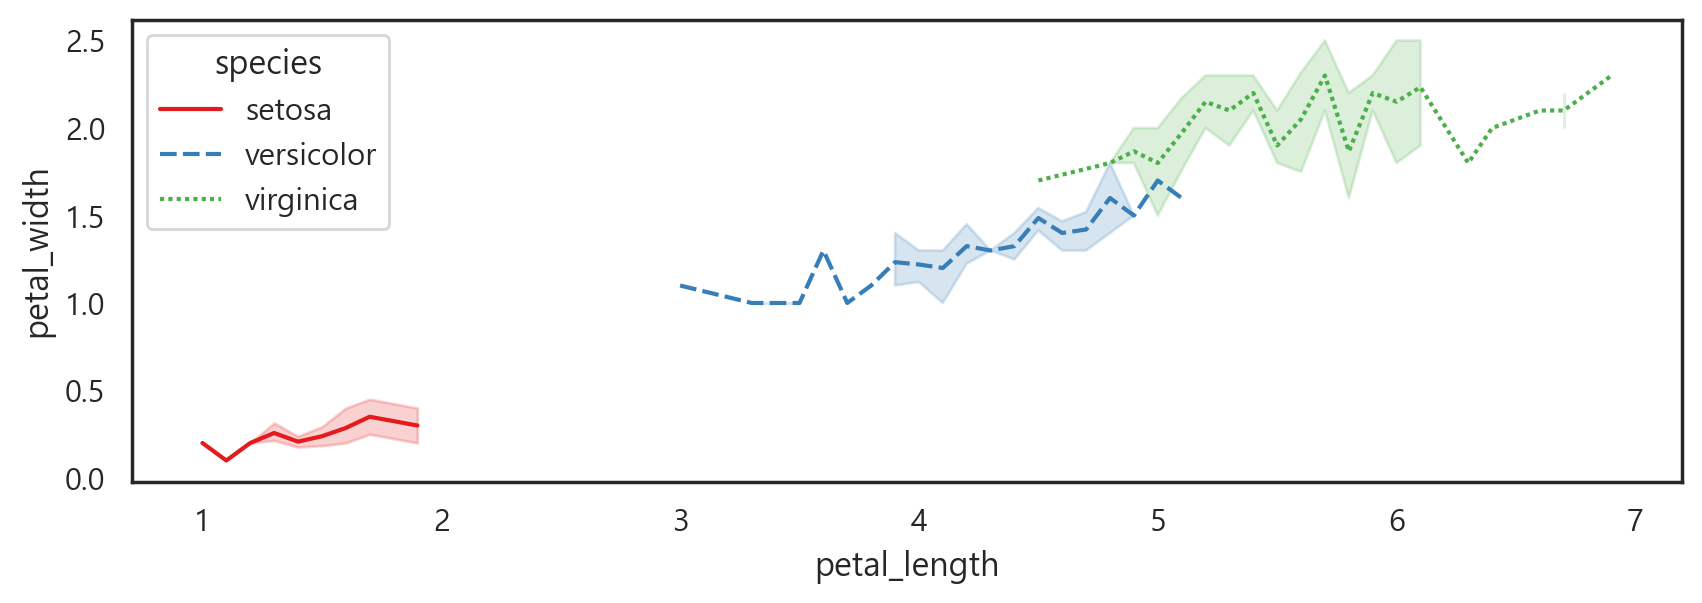

In [33]:
# 종별 lineplot 
# lineplot의 음영 : 95%신뢰구간
sns.lineplot(data=iris, x='petal_length', y='petal_width',
            hue='species', palette='Set1', style='species')
plt.show()

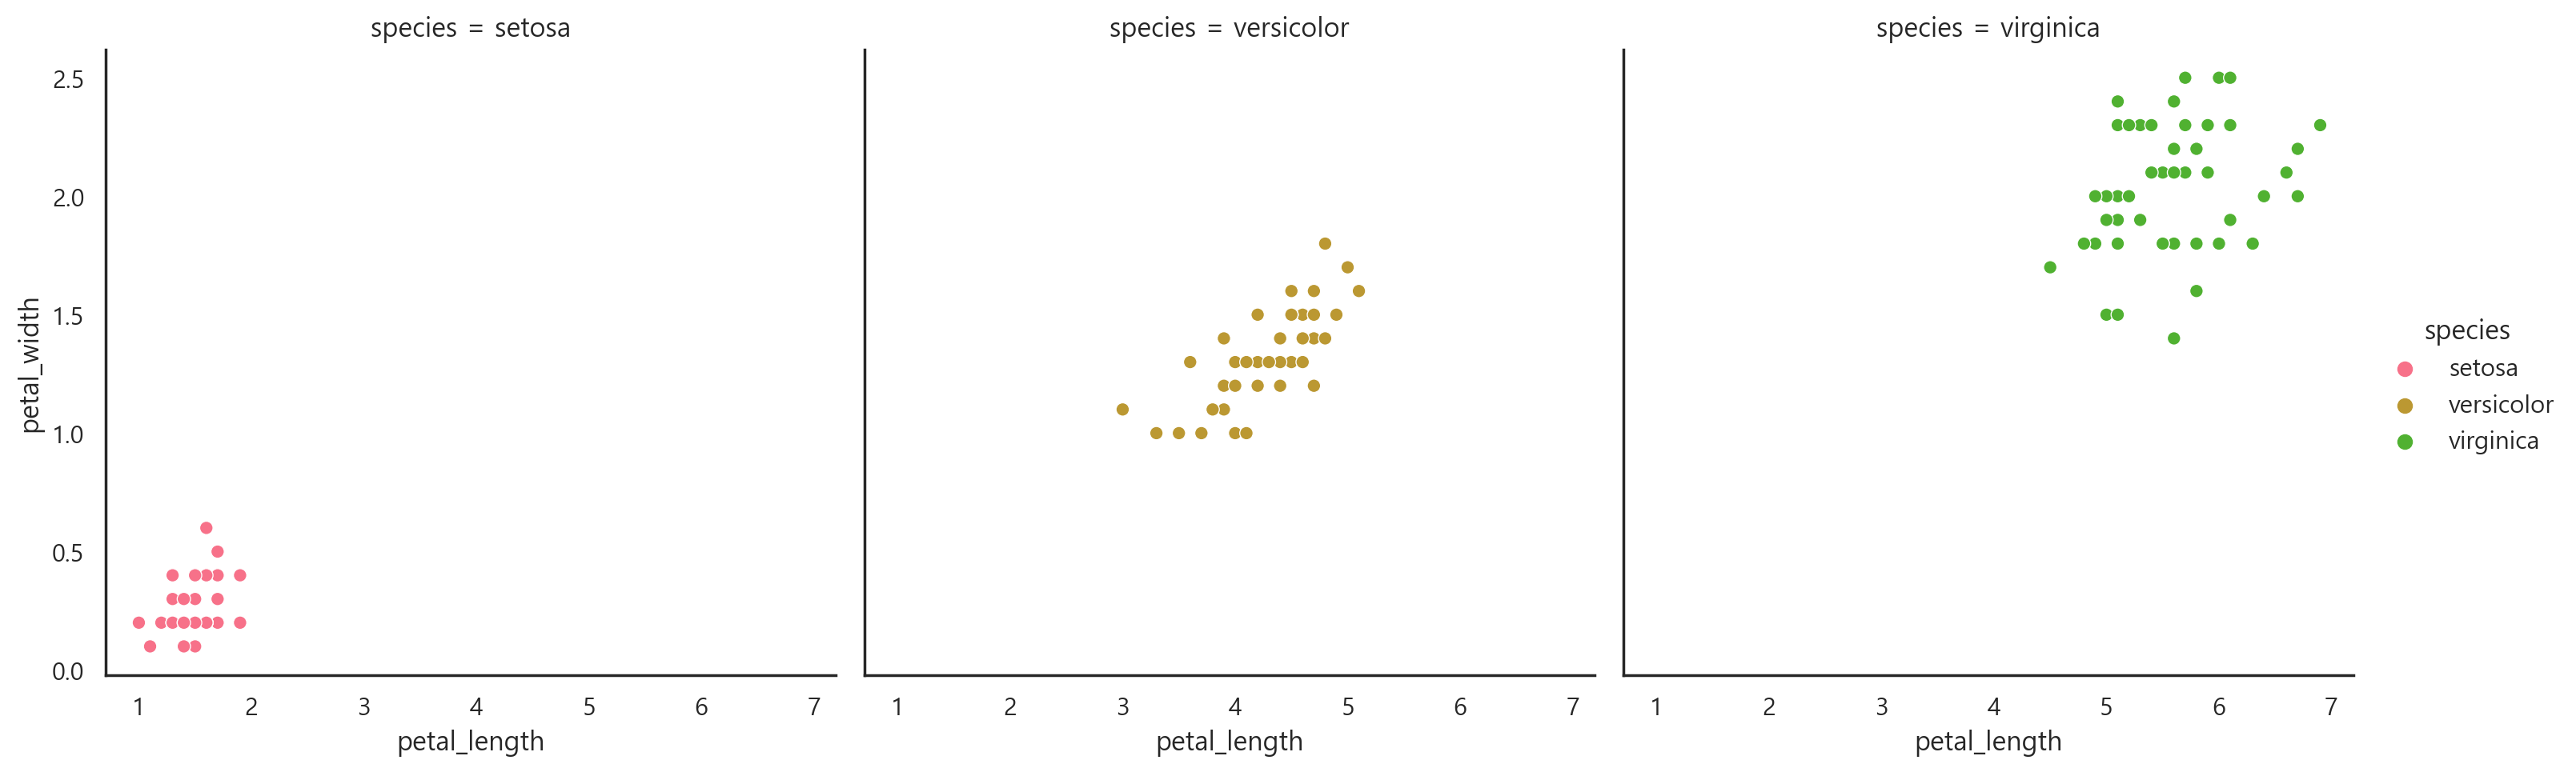

In [32]:
# 종별 lineplot을 서브플롯으로
sns.relplot(data=iris, x='petal_length', y= 'petal_width',
           hue = 'species',
           #kind='line' #kind=scatter가 기본값
           col= 'species')#species별 서브풀롯
            #col_wrap2=2, #한줄에 표현할 서브플롯수한줄에 표현할 서브플롯수

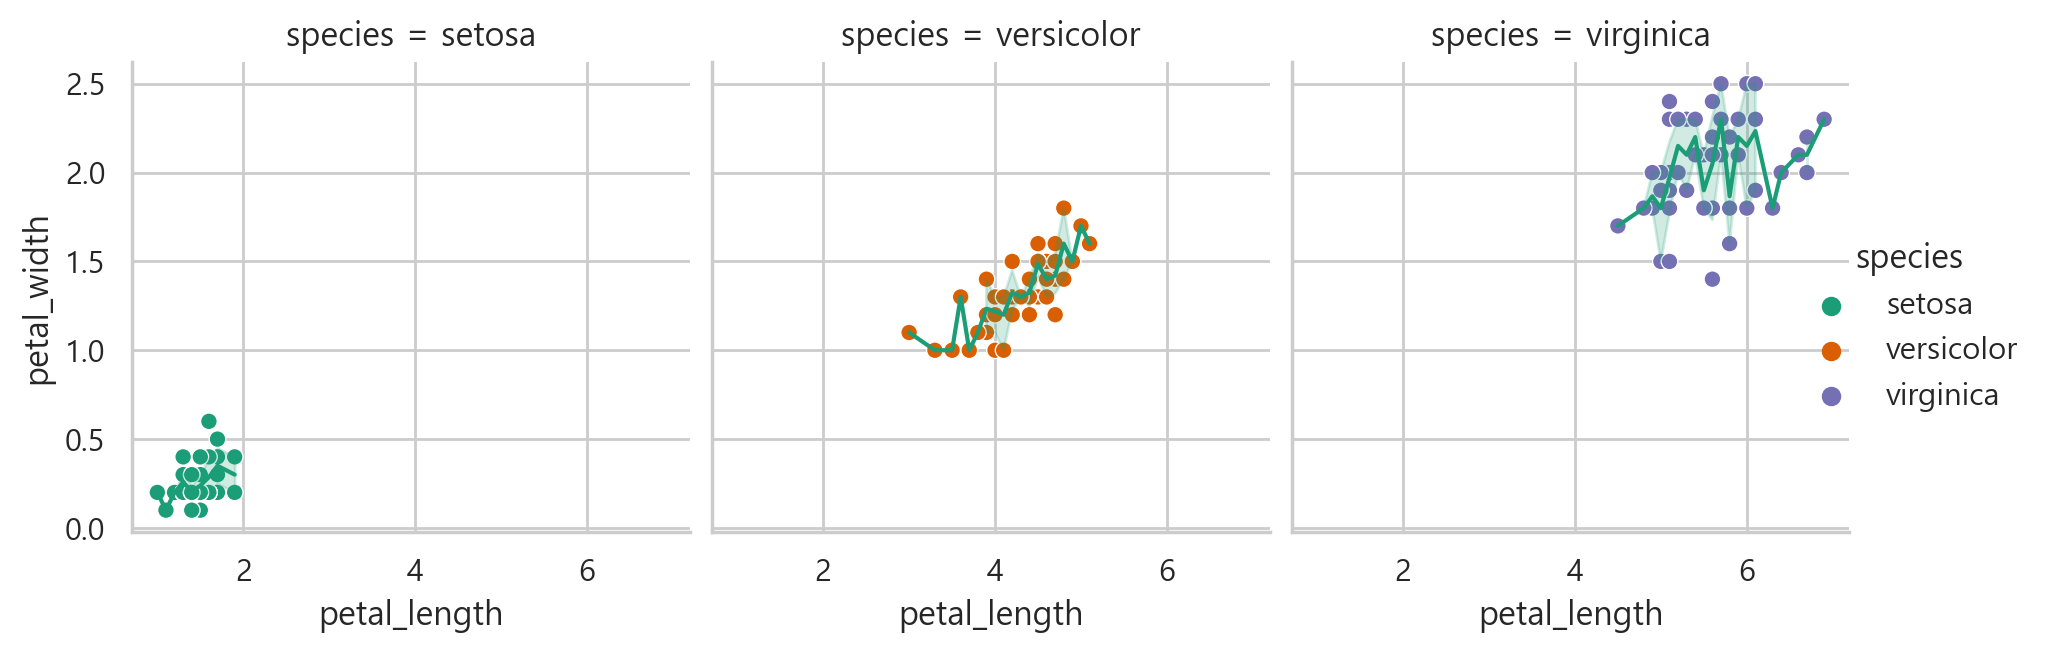

In [37]:
# line과 scatter를 종별 서브플롯으로 겹쳐서 
g = sns.relplot(data=iris, x='petal_length', y='petal_width',
           hue='species',
           # kind='line', # kind='scatter'가 기본값
           col='species', # species별 서브플롯
           #col_wrap=2,    # 한줄에 표현될 서브플롯 수
           )
# g그래프에 line플롯을 추가
g.map_dataframe(sns.lineplot, x='petal_length', y='petal_width')
# 크기 조정 : 서브플롯함수에서는 내부적으로 figure 새로 만들기 때문에 figsize 무시
g.fig.set_size_inches(10,3)


In [ ]:
# ax[0]에는 scatter, ax[1] lineplot
fig, ax= plt.subplots(1, ncol=2)
sns.scatter

### 2) 범주형 그래프
```
    * x축이 범주형 데이터
    (ex) stripplot(무작위 흩뿌림), swarmplot(겹치지 않는 산점도), 
        barplot, barhlplot(y의 평균으로 막대그래프), pointplot(y의 평균으로 line), 
        countplot(count는 x의 빈도수가 높이),
        boxplot ,violinplot, boxeㅜplot => catplot(서블플롯)
```
    

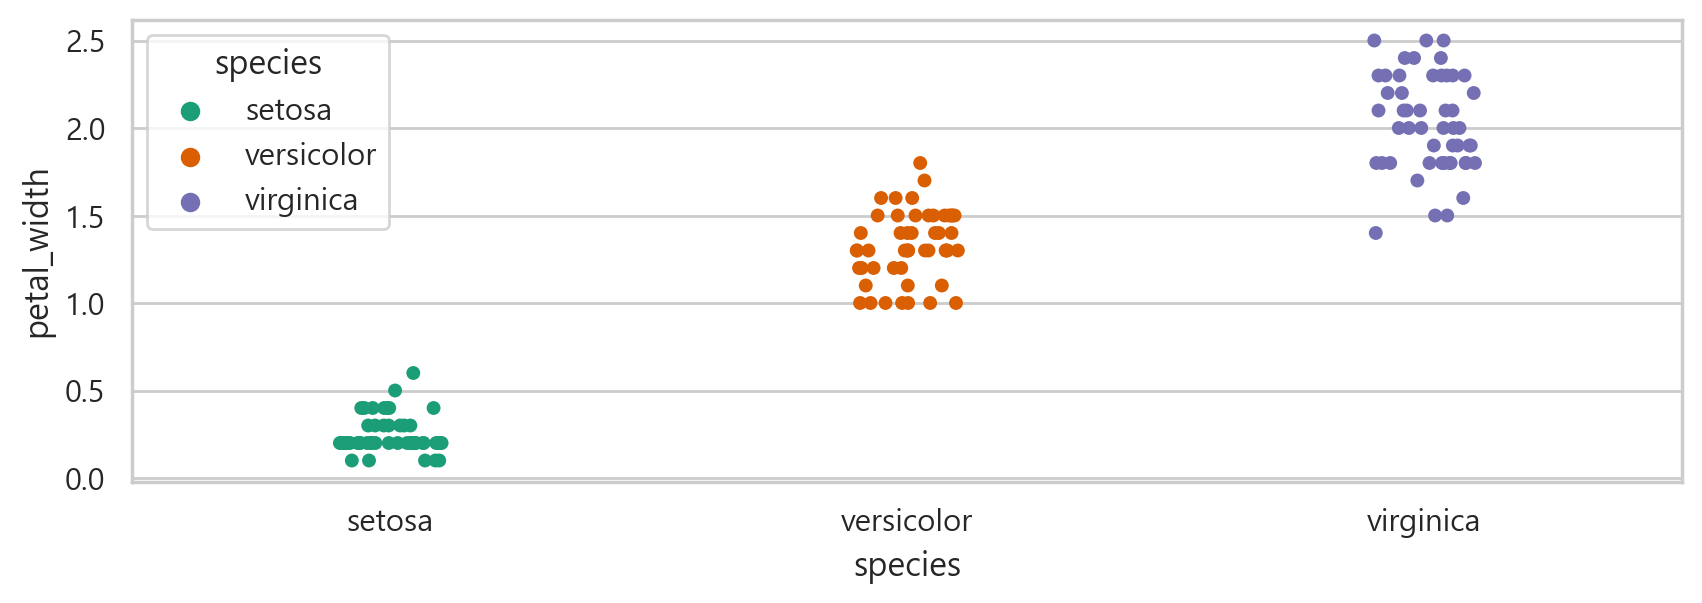

In [40]:
# x축이 범주형일때의 산점도
sns. stripplot(data=iris, x= 'species', y='petal_width' ,hue = 'species')
plt.show()

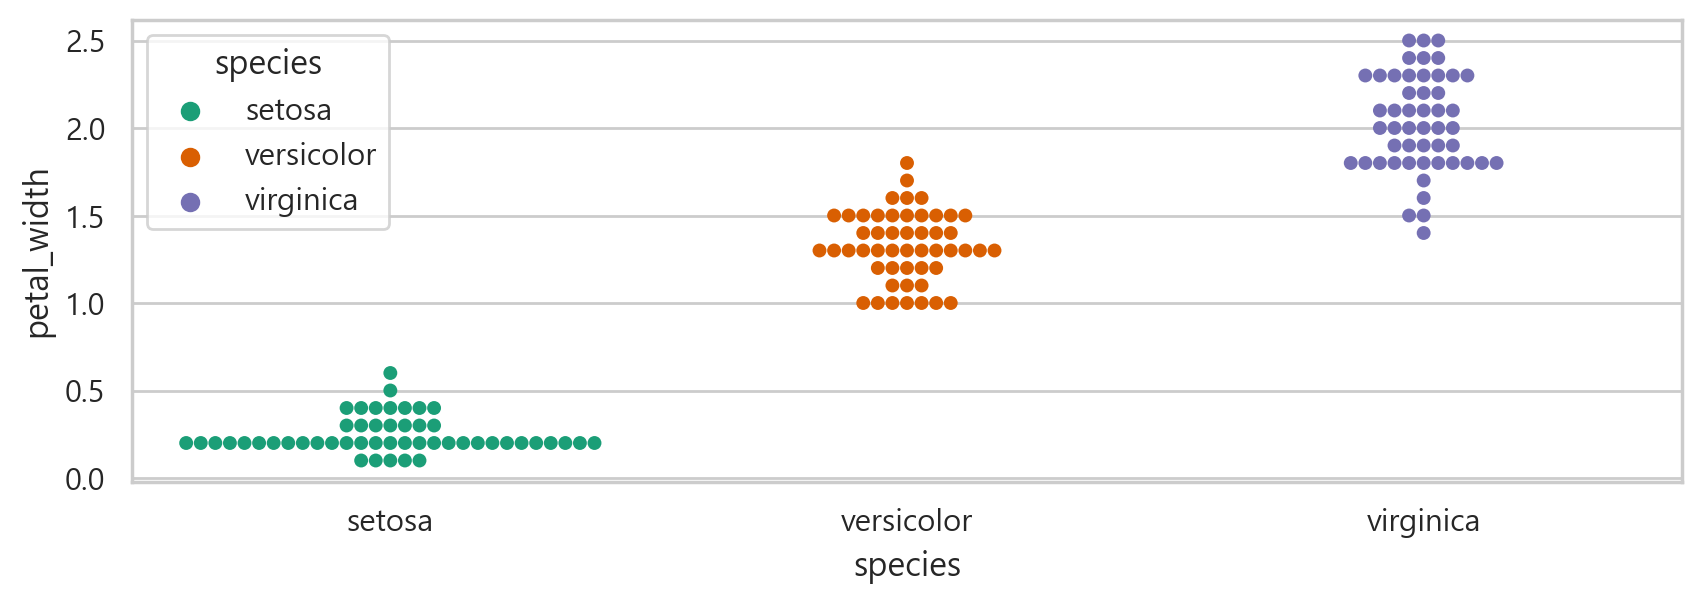

In [41]:
# x축이 범주형일때의 산점도 (분포포함)
sns. swarmplot(data=iris, x= 'species', y='petal_width' ,hue = 'species')
plt.show()

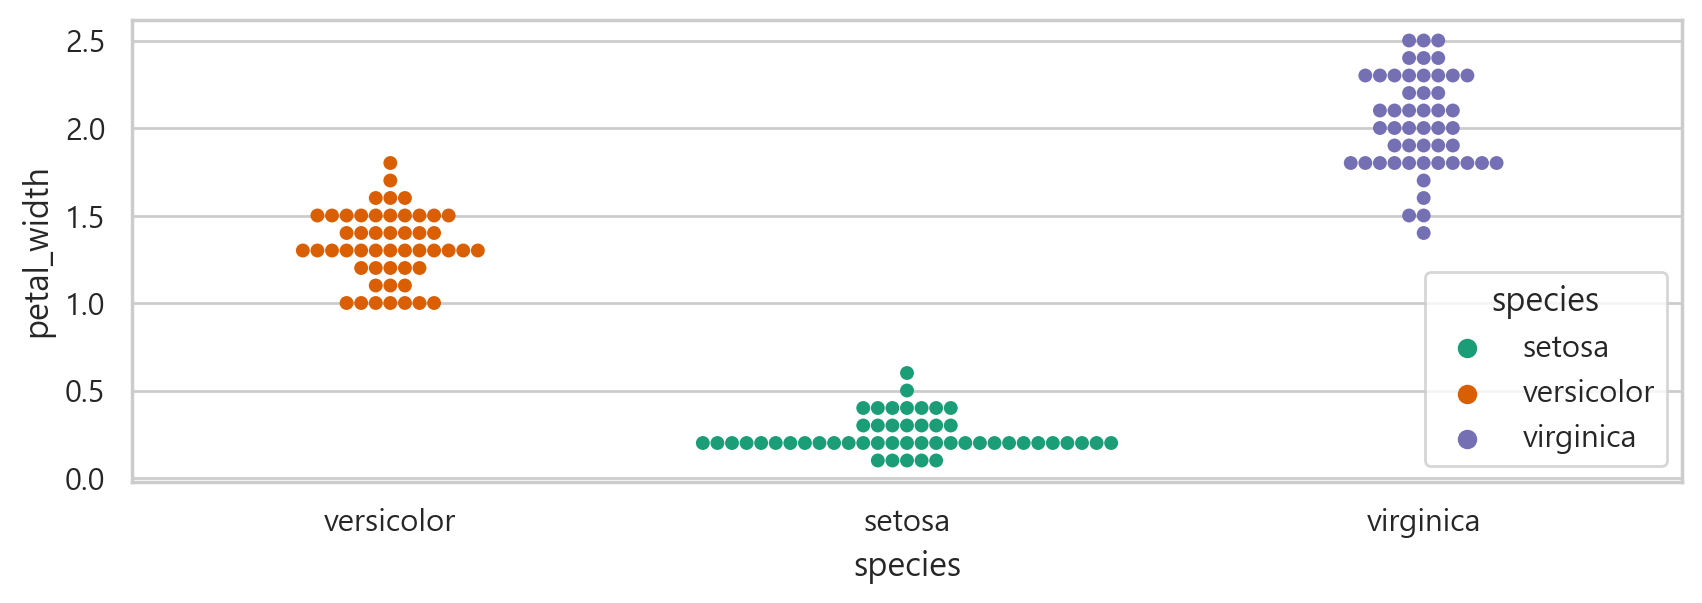

In [55]:
sns.swarmplot(data=iris,
             x='species',
             y='petal_width',
             hue='species',
             order=['versicolor', 'setosa' , 'virginica'])
plt.show()


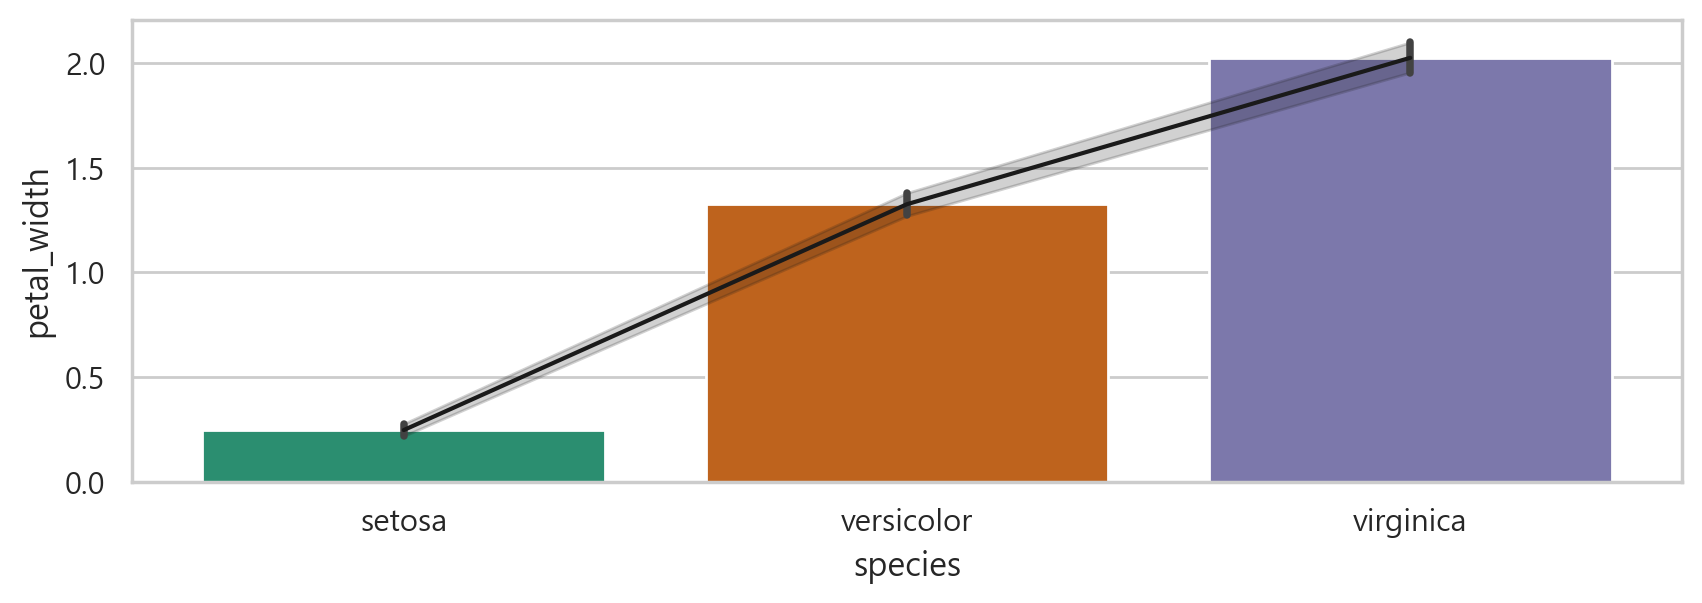

In [81]:
# barplot, barhplot, pointplot : 각 범주별 평균값(y)과 그에 대한 신뢰구간
            # 신뢰구간 제외 : errorbar=None
sns.barplot(data=iris, x='species', y='petal_width',
           # errorbar=None
           )
sns.lineplot(data=iris, x='species', y='petal_width', color='k')
plt.show()

<Axes: xlabel='species', ylabel='petal_width'>

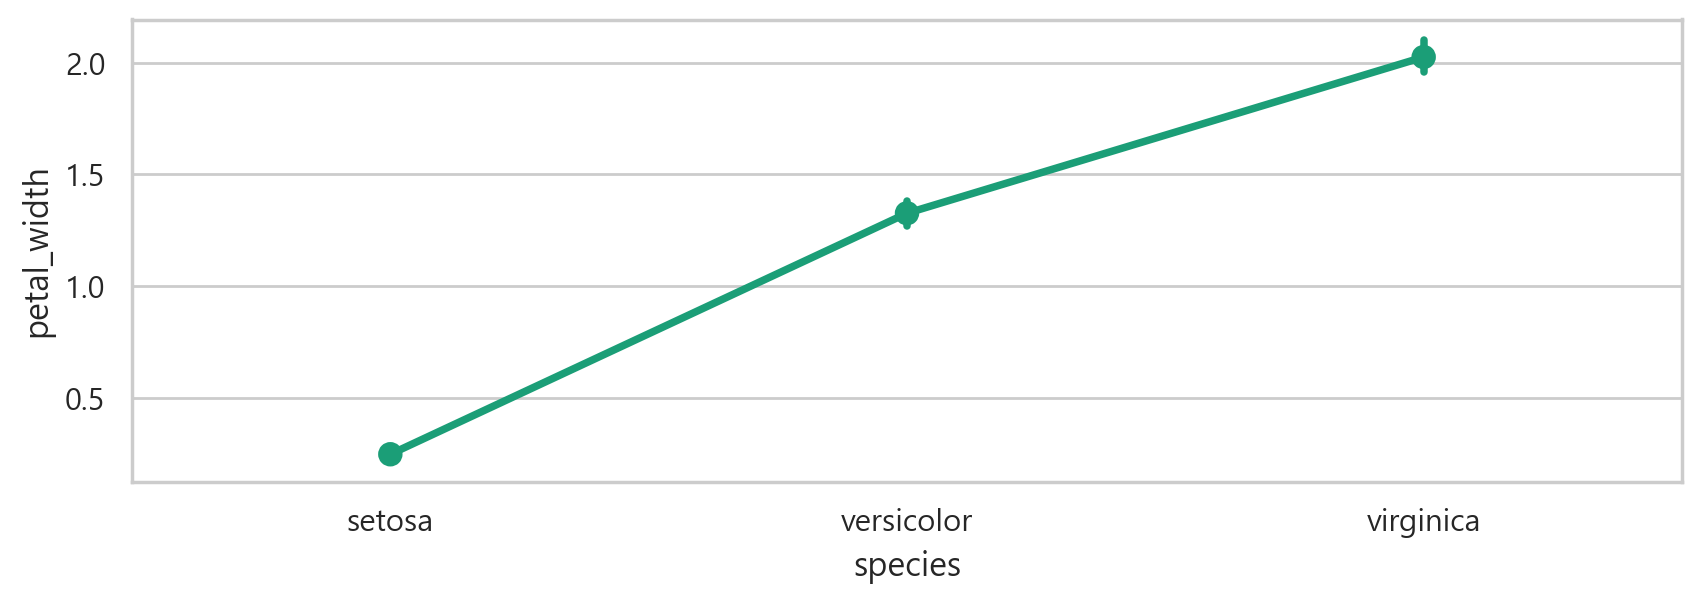

In [79]:
sns.pointplot(data=iris, x='species', y='petal_width')

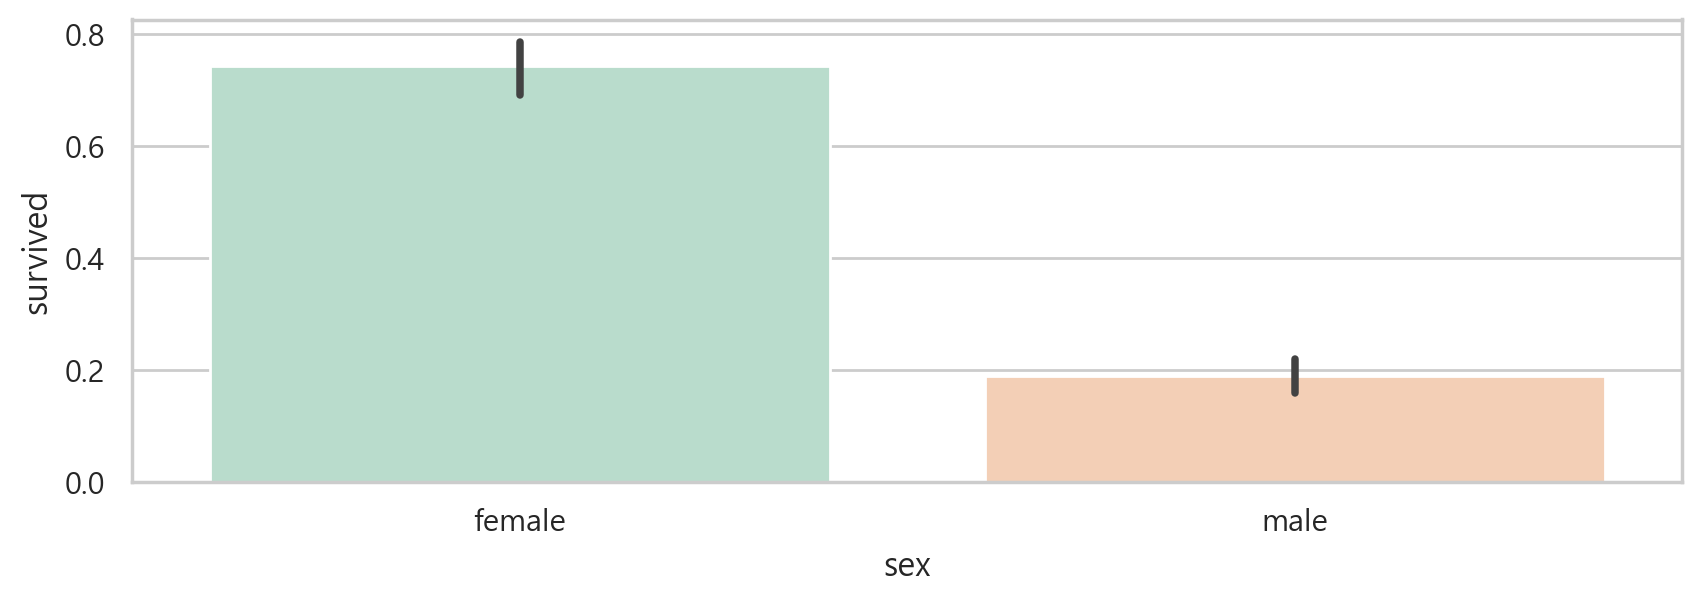

In [54]:
#성별 생존율을 막대그래프 
sns.barplot(data=titanic, x='sex',y='survived', order = ['female','male'], palette = 'Pastel2')
plt.show()

In [57]:
titanic.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [59]:
#남자 중 비생존자
len(titanic[(titanic.sex=="male") & (titanic.survived==0)])

468

In [60]:
#남자 중 생존자
len(titanic[(titanic.sex=="male") & (titanic.survived==1)])

109

In [62]:
#여자 중 비생존자
len(titanic[(titanic.sex=="female") & (titanic.survived==0)])

81

In [63]:
#여자 중 생존자
len(titanic[(titanic.sex=="female") & (titanic.survived==1)])

233

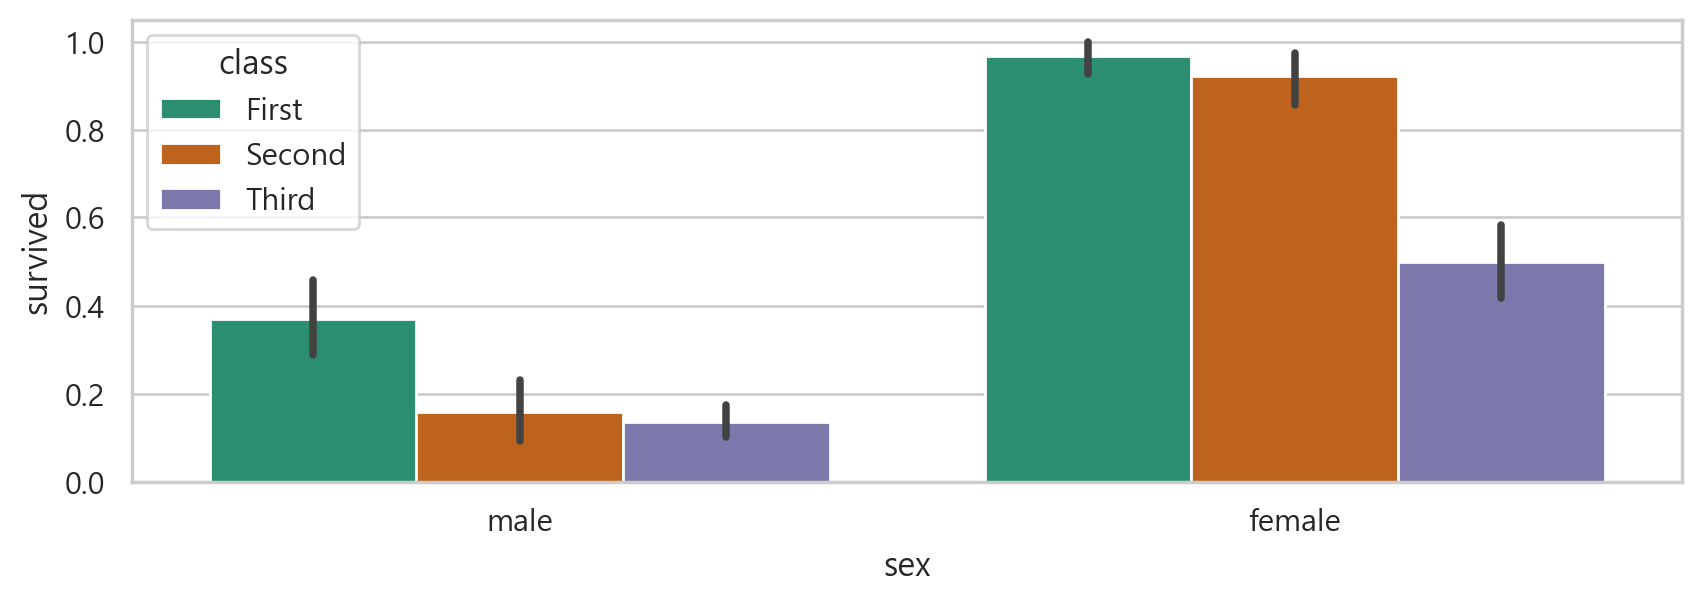

In [65]:
#성별 생존율 hue = 'class'
sns.barplot(data=titanic, x= 'sex',y='survived',hue='class')
plt.show()

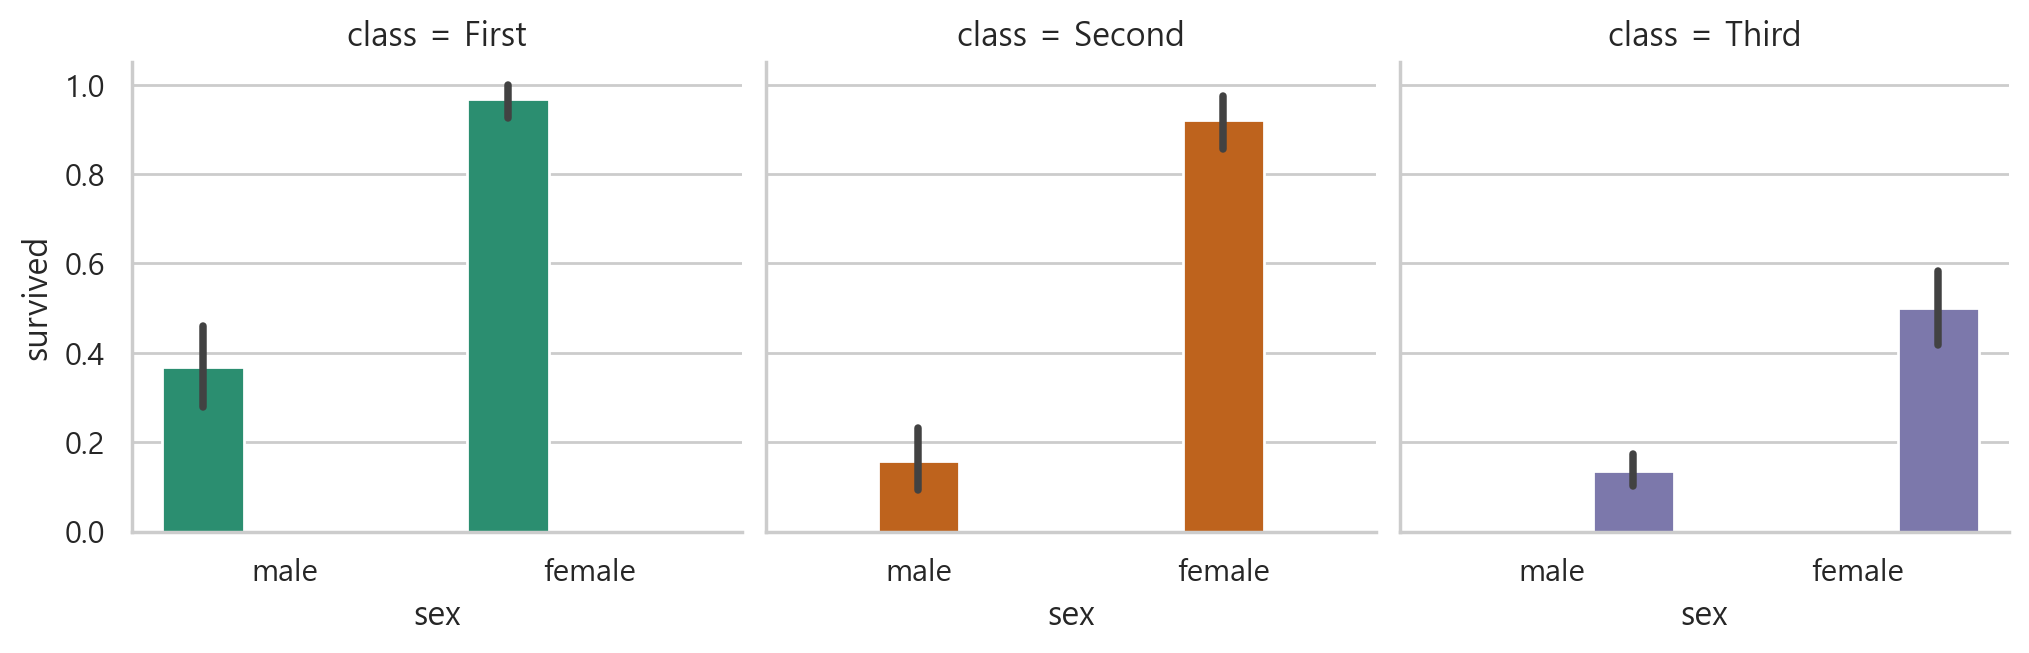

In [68]:
# class 별로 성별생존율을 서브플롯(막대그래프)
g= sns.catplot(data= titanic, x= 'sex',y='survived', hue = 'class', kind= 'bar', #기본값은 strip
           col='class') #col_wrap=2, #한행에 그려질 서브플롯 갯수, 기본값은 n개

g.fig.set_size_inches(10,3)

<Axes: xlabel='class', ylabel='survived'>

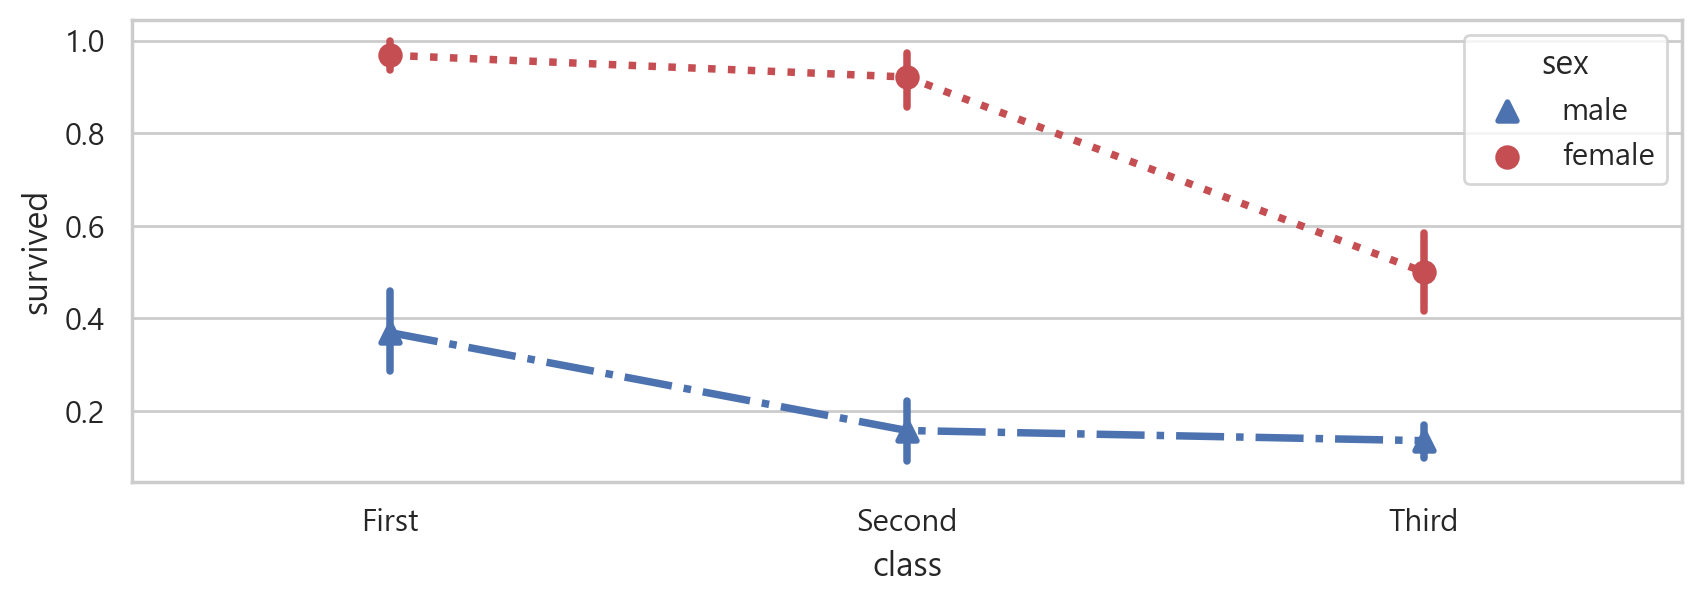

In [70]:
#성별 생존율 hue = 'class'
sns.pointplot(data=titanic, x='class',y='survived',hue='sex',markers=['^','o'],
             linestyles = ['-.',':'],palette={'male':'b', 'female':'r'})

In [74]:
print('deck 전체 데이터 갯수: {}, 결측치 갯수:'.format(len(titanic)),titanic.deck.isna().sum())

deck 전체 데이터 갯수: 891, 결측치 갯수: 688


In [ ]:
totallen = len(titanic)
nanlen= titanic.deck.isna(0).sum

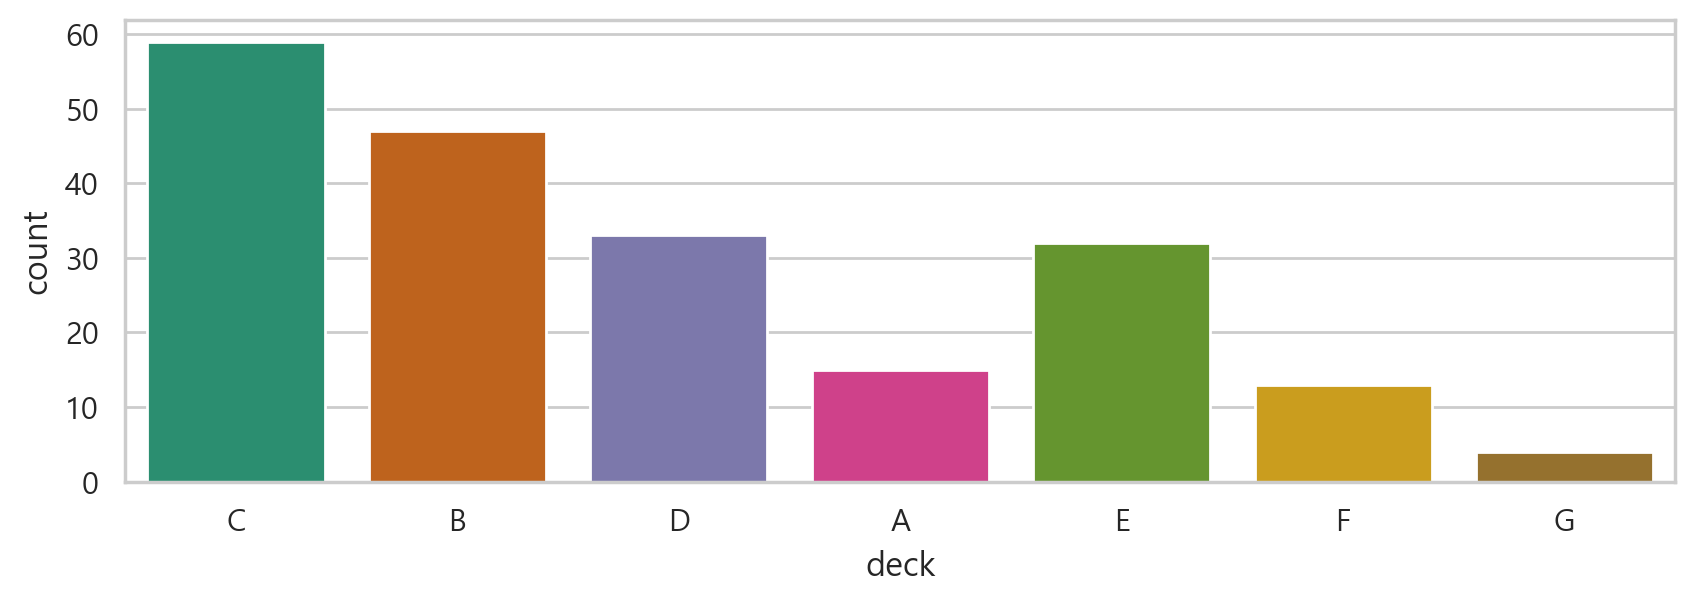

In [76]:
#deck 별 개수를 막대그래프(countplot)
sns.countplot(data= titanic, x= 'deck', order= ['C','B','D','A','E','F','G'])
plt.show()

In [82]:
deckcnt = titanic.deck.value_counts() #범주별 데이터갯수(정렬포함)
deckcnt #deckcnt.index 가 count 가 큰 수 

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

<Axes: xlabel='sex', ylabel='age'>

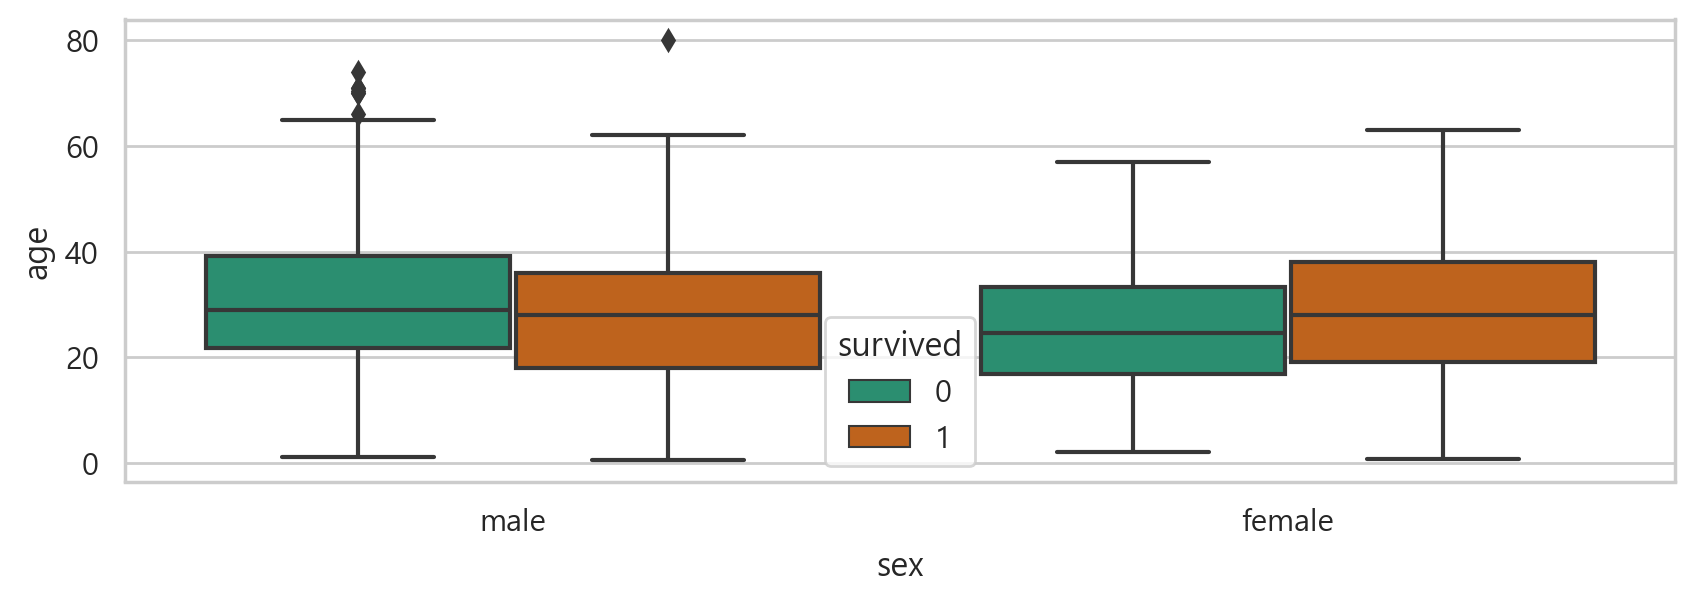

In [84]:
#boxplot 
sns.boxplot(data=titanic, x='sex',y='age', hue= 'survived')

<Axes: xlabel='sex', ylabel='age'>

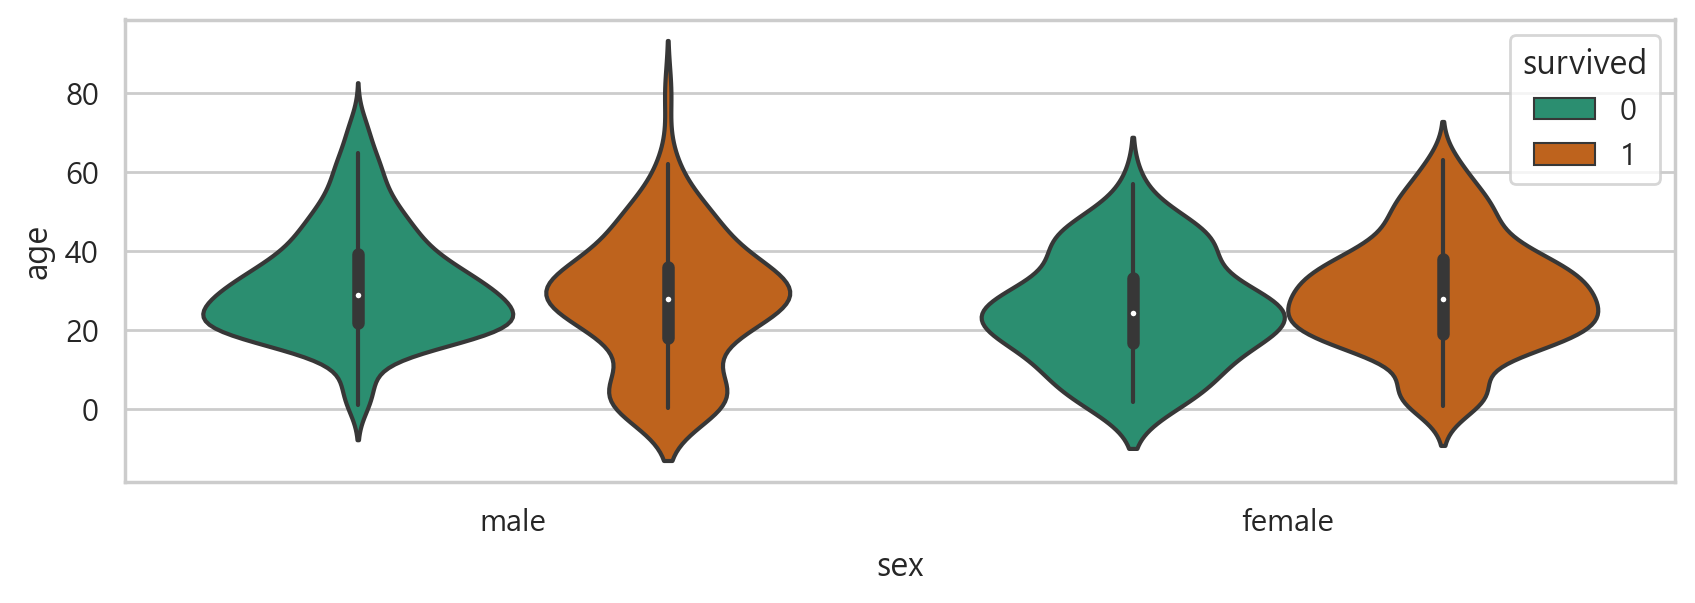

In [86]:
sns.violinplot(data=titanic, x='sex',y='age', hue= 'survived')

<Axes: xlabel='age', ylabel='sex'>

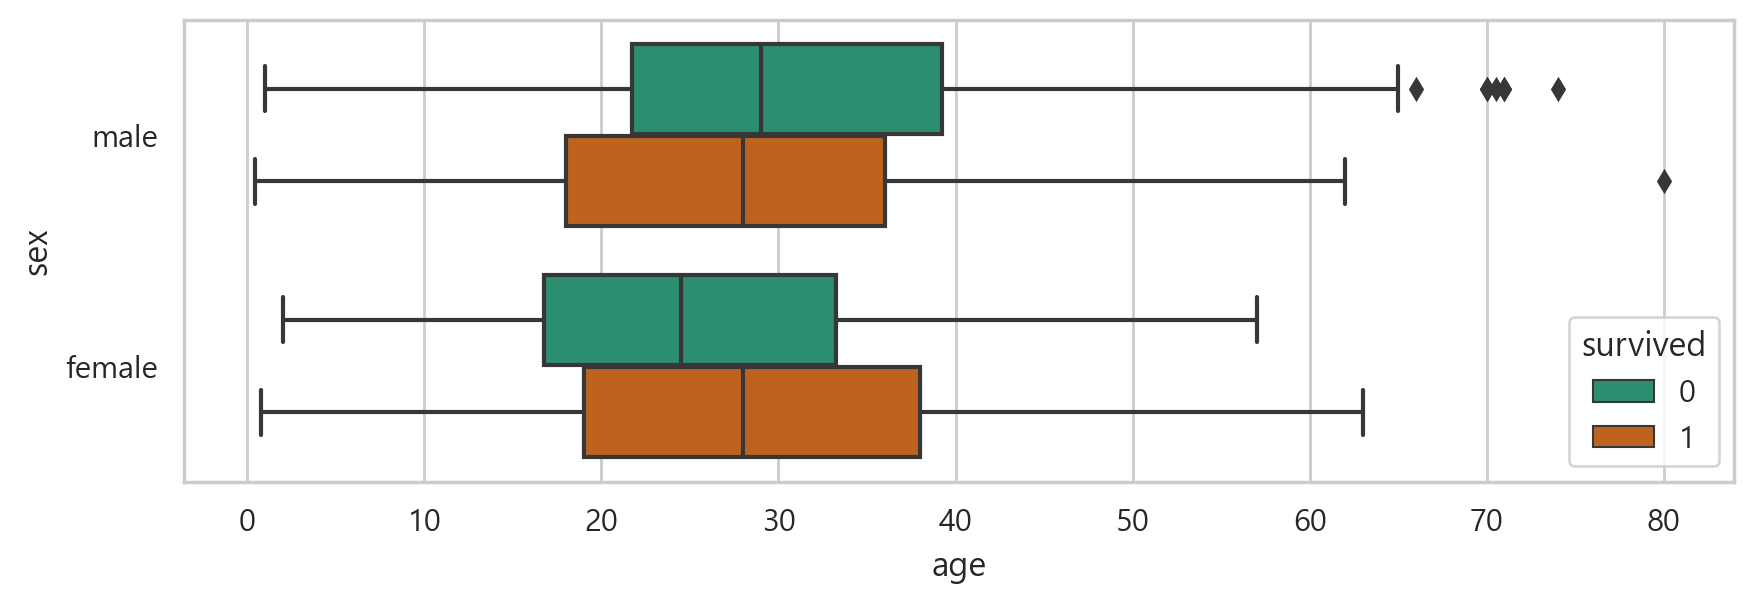

In [87]:
sns.boxplot(data=titanic, y='sex',x='age', hue= 'survived')

<Axes: xlabel='age', ylabel='sex'>

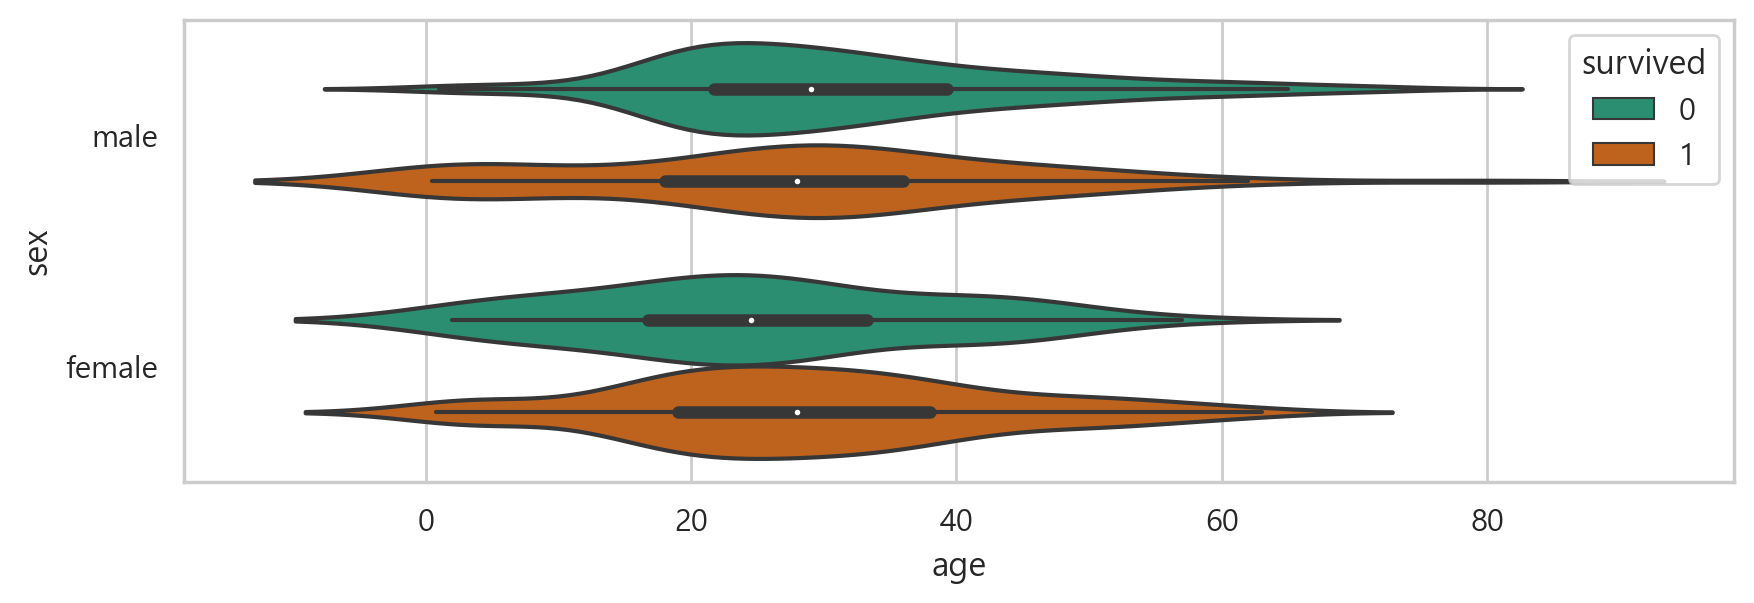

In [88]:
sns.violinplot(data=titanic, y='sex',x='age', hue= 'survived')

<Axes: xlabel='sex', ylabel='age'>

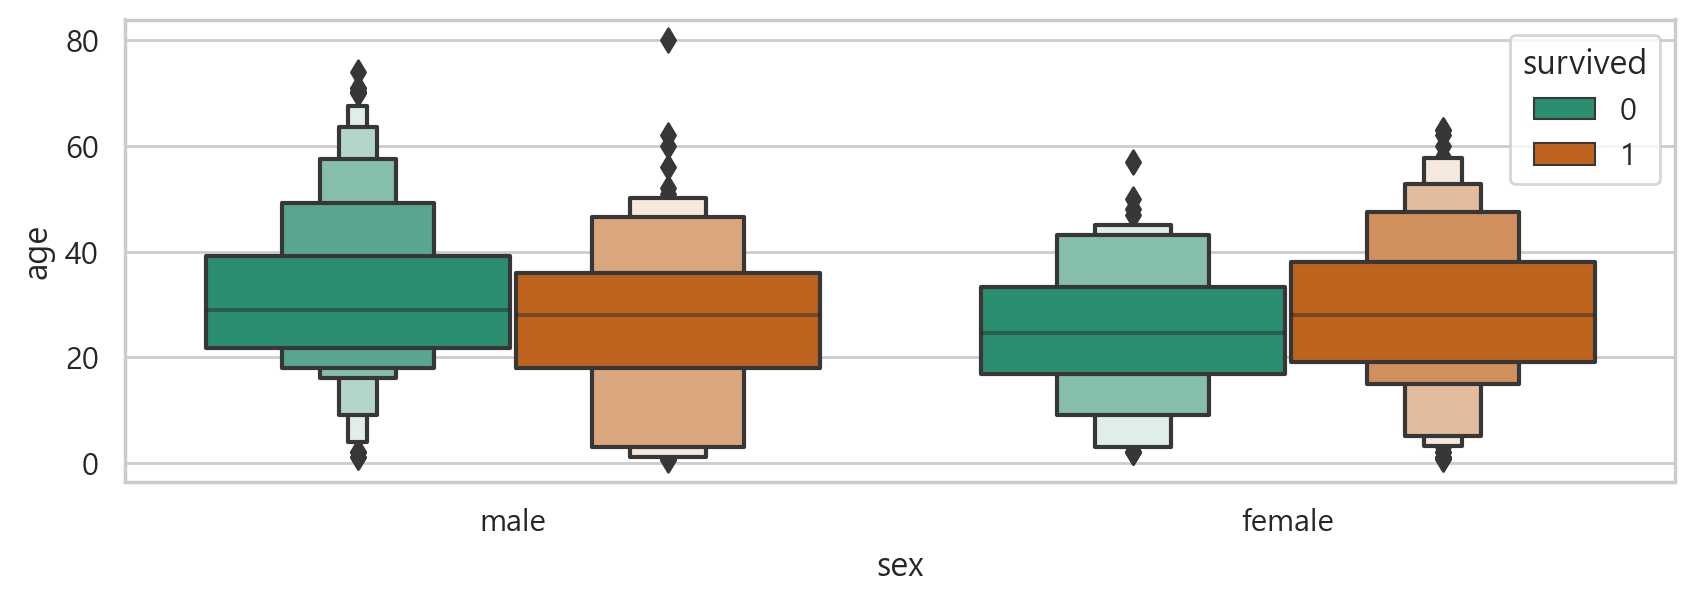

In [90]:
sns.boxenplot(data=titanic, x='sex',y='age', hue= 'survived')

### 3) 쌍관계그래프
- pairplot: 데이터프레임에 포함된 모든 수치형 변수 쌍에 대해 산점도(scatter) 히스토그램

### 4) 밀도 그래프

In [96]:
import numpy as np
x= np.random.randn(10000) #평균 0 ,표준편차 1인 정규분포로 10000개 1차원배열

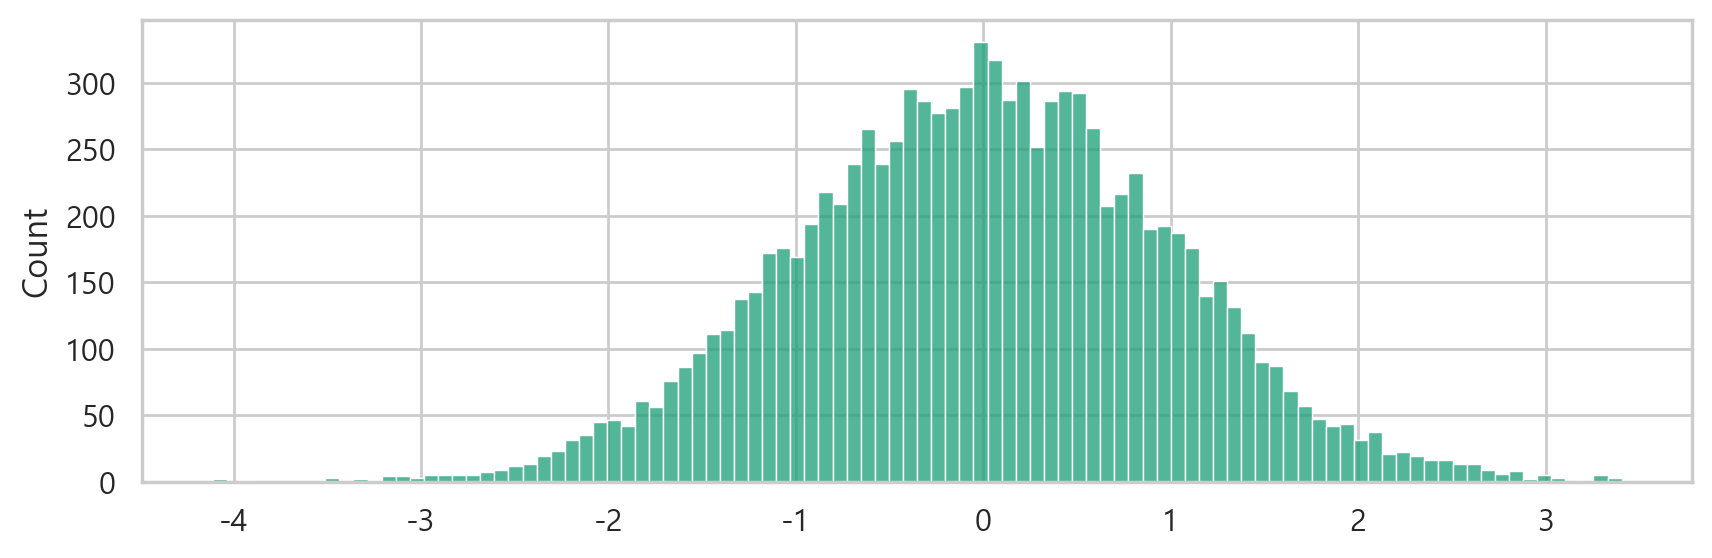

In [98]:
sns.histplot(x, bins= 100)
plt.show()

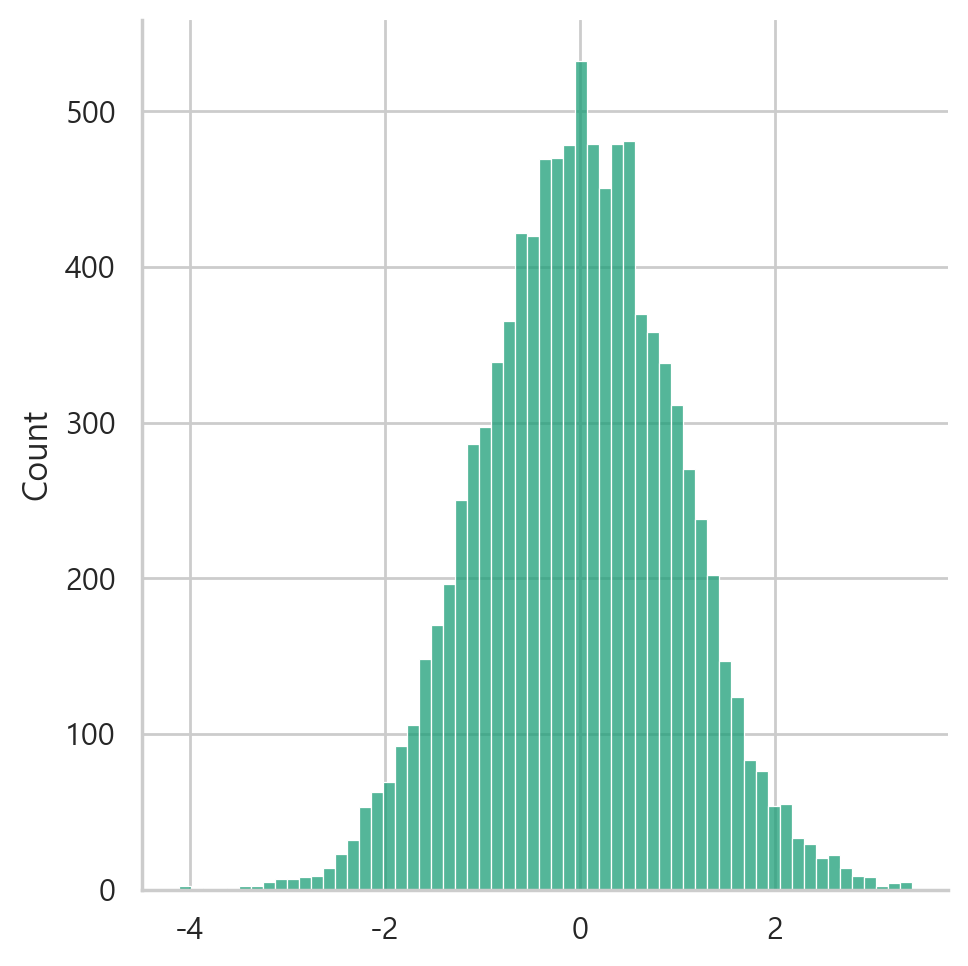

In [99]:
sns.displot(x)

## 5) 회귀 그래프

In [100]:
corr = iris.corr(numeric_only = True)
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


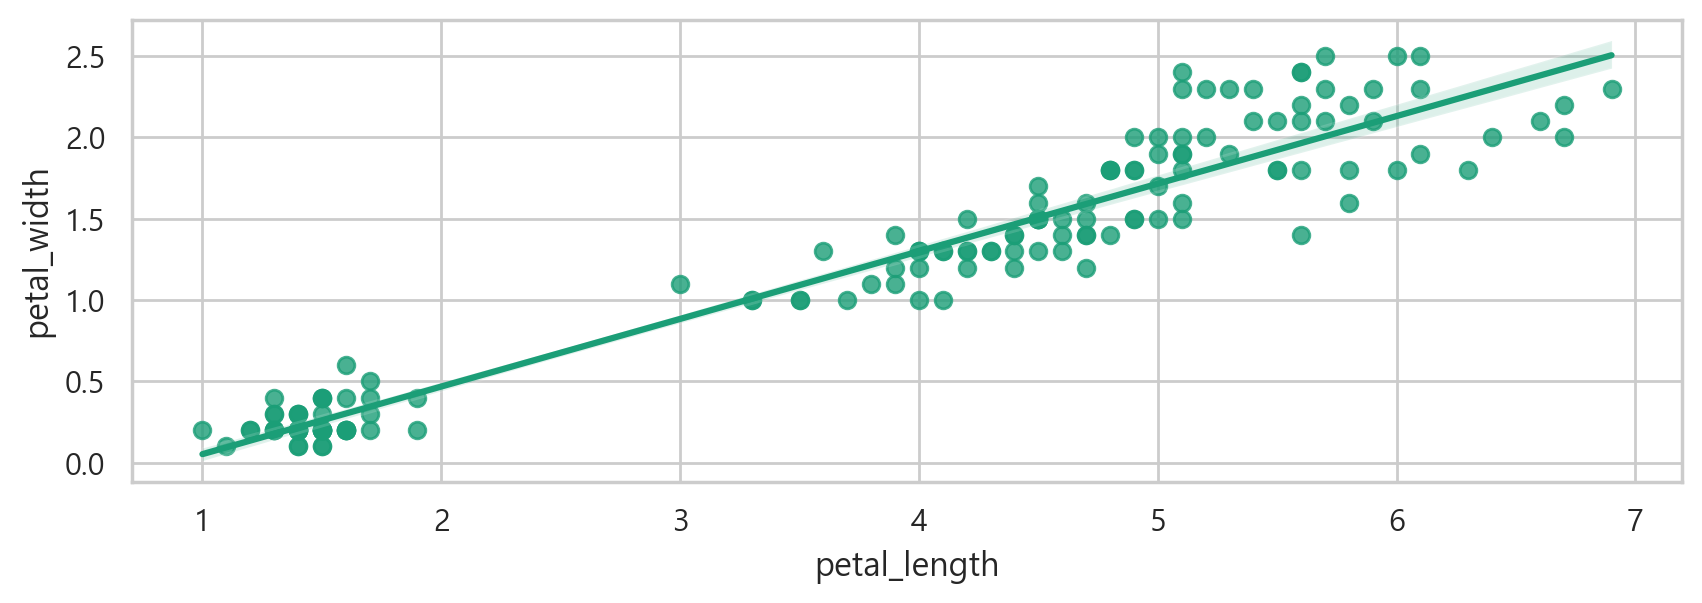

In [104]:
# 회귀 그래프 : regplot(hue 사용 불가), lmplot(hue 사용 가능)
sns.regplot(data=iris, x='petal_length', y='petal_width')
plt.show()

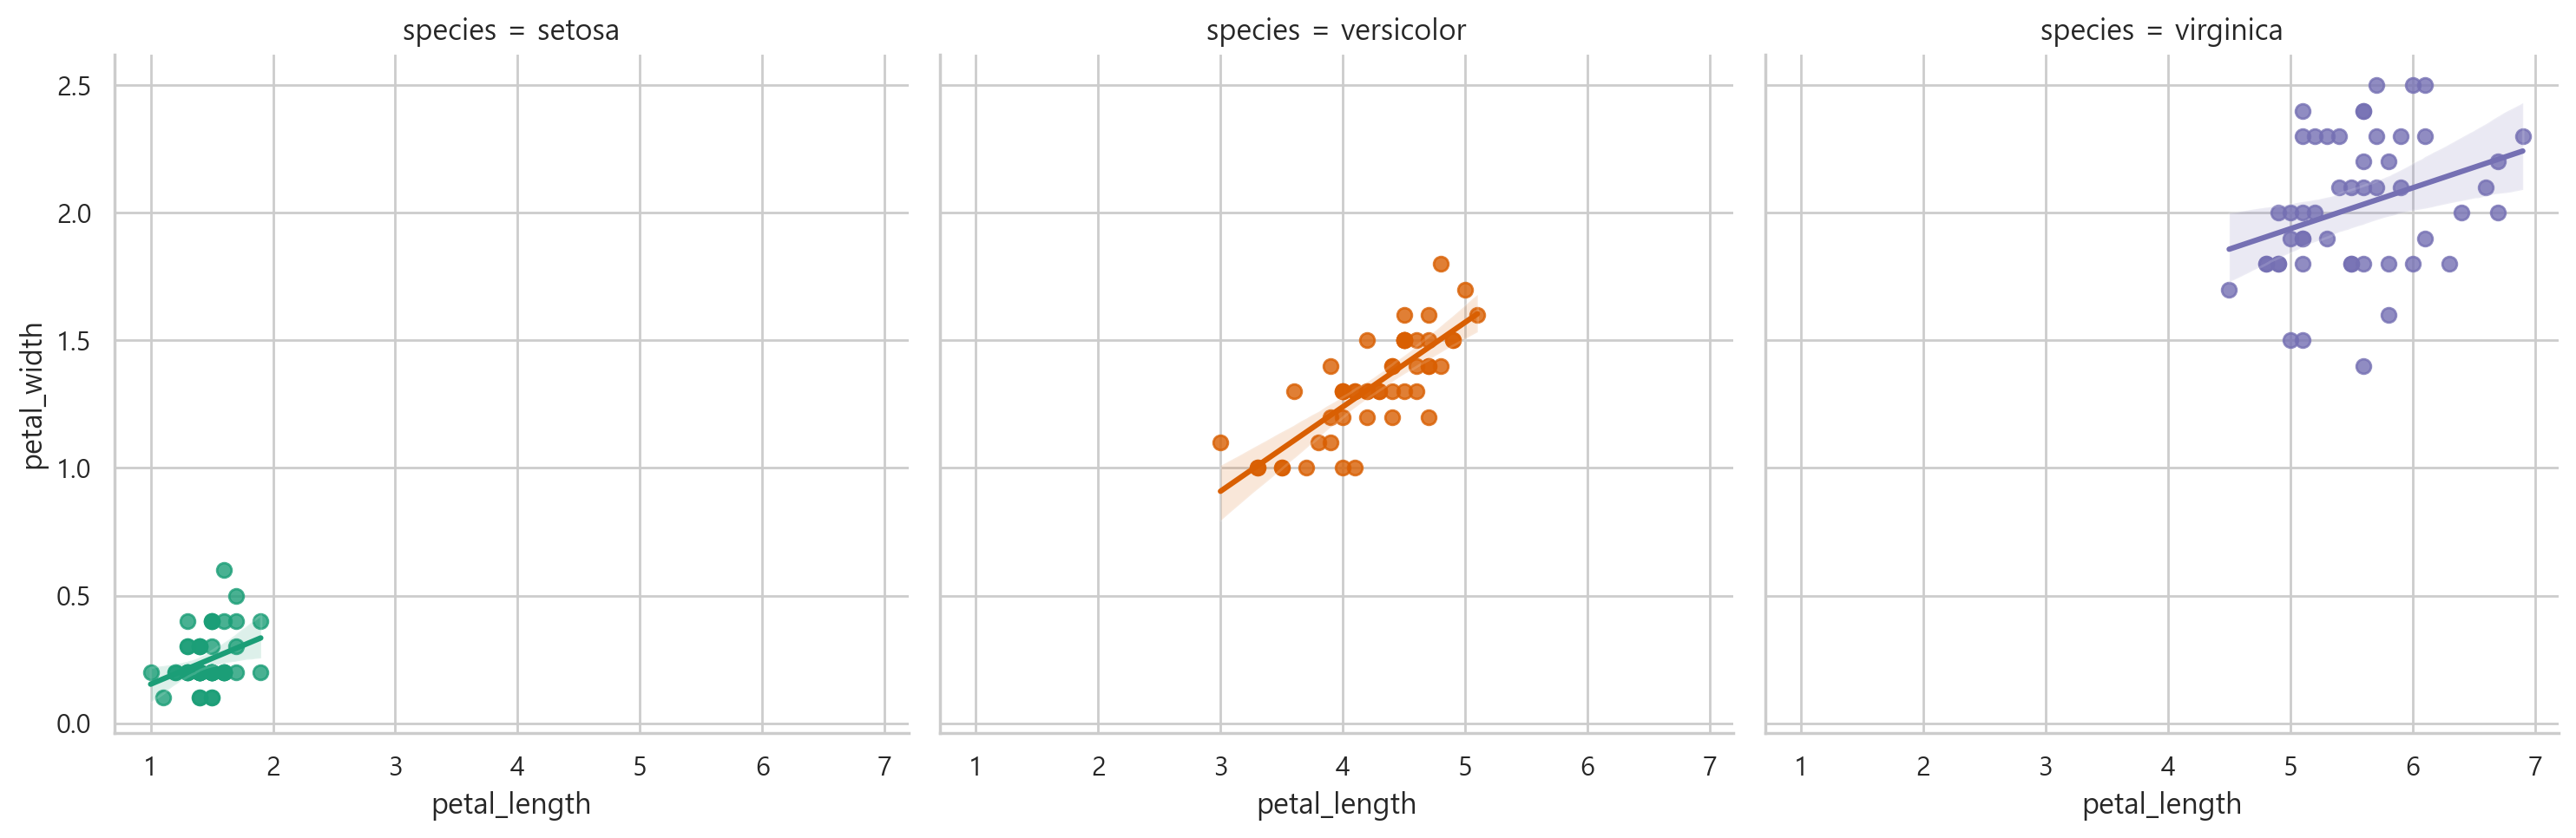

In [103]:
#종별 회귀그래프
sns.lmplot(data=iris, x='petal_length', y= 'petal_width', hue = 'species', col='species')
plt.show()

## 2.4 다중그래프를 위한 FaceGrid 

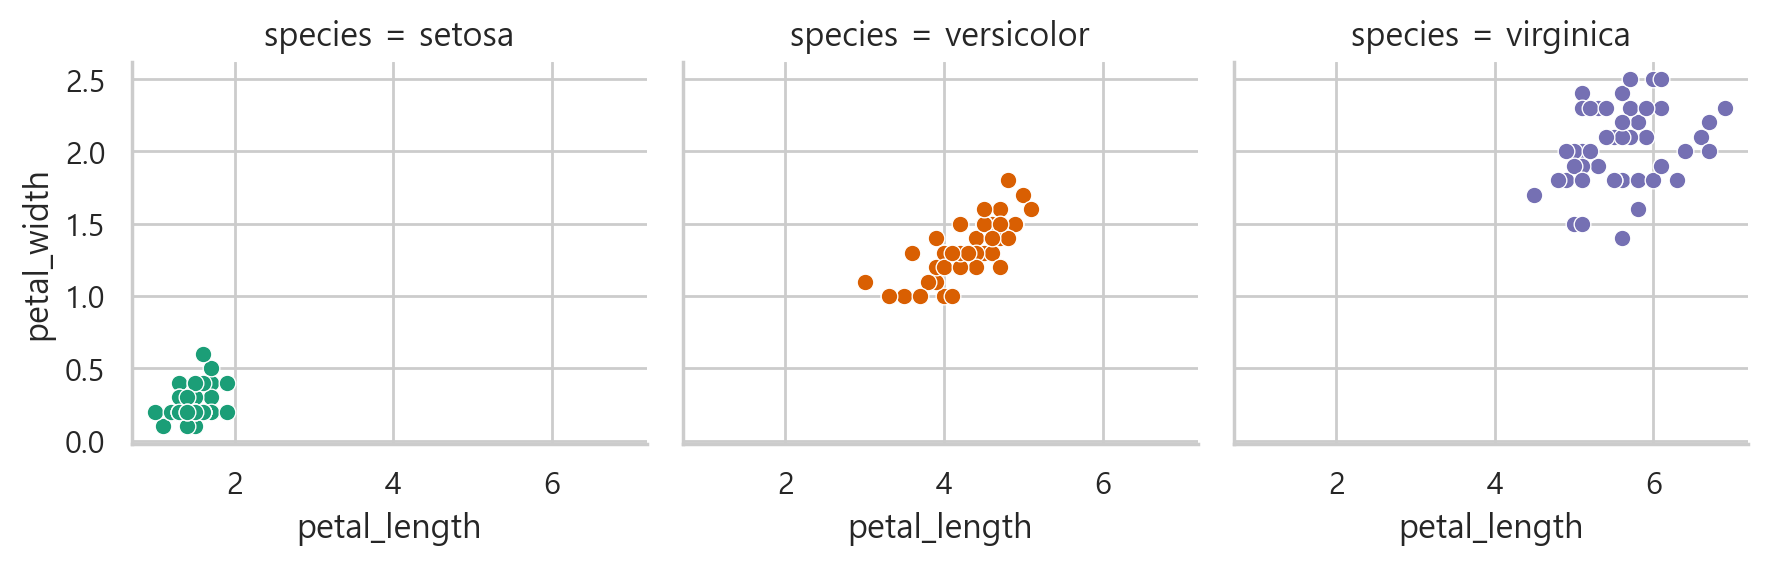

In [105]:
g = sns.FacetGrid(iris, col='species', hue='species')
g.map(sns.scatterplot, 'petal_length', 'petal_width')
plt.show()

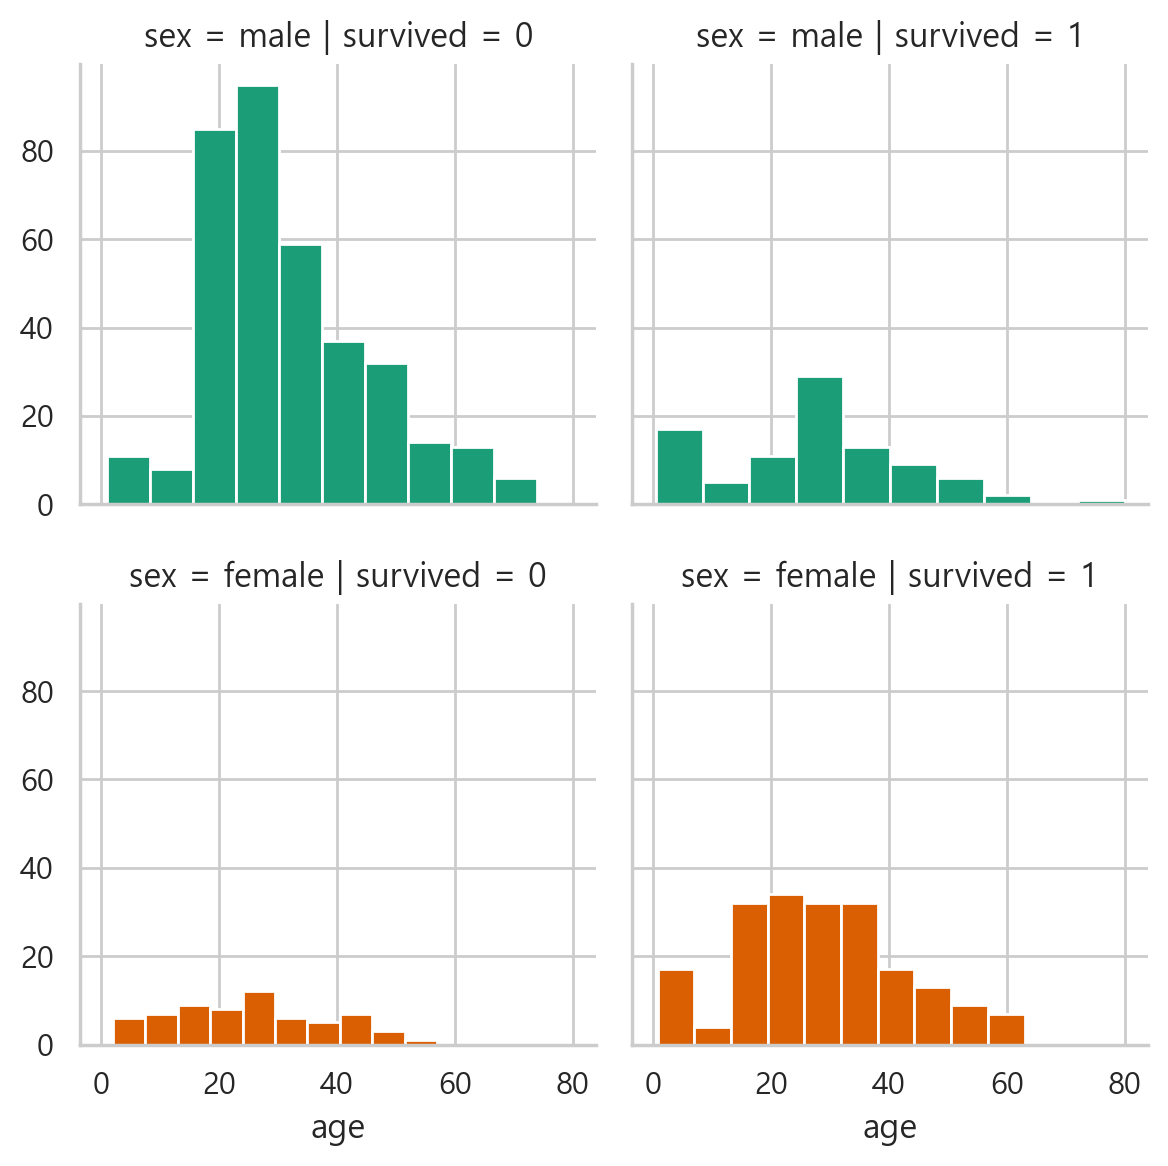

In [106]:
g = sns.FacetGrid(titanic, col='survived', hue='sex', row='sex')
g.map(plt.hist, 'age')
plt.show()